In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
df = pd.read_csv('train.csv')
df.drop(df[df['SalePrice'] > 300000].index, inplace = True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',  'YearBuilt']
label = ['SalePrice']
X = df[features]
y = df[label]

In [ ]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt
0,7,1710,2,548,856,856,2003
1,6,1262,2,460,1262,1262,1976
2,7,1786,2,608,920,920,2001
3,7,1717,3,642,756,961,1915
4,8,2198,3,836,1145,1145,2000


In [ ]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# from sklearn.linear_model import ElasticNetCV
# linear_model = ElasticNetCV(l1_ratio= [.1, .5, .7,
#     .9, .95, .99, 1])

In [ ]:
from sklearn.linear_model import RidgeCV
linear_model = RidgeCV(alphas=(0.001, 0.01,0.1,1.0,10.0,100.0,1000.0),cv=None, 
                         scoring='neg_root_mean_squared_error')

In [ ]:
# from sklearn.linear_model import LinearRegression

# linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
        scoring='neg_root_mean_squared_error')

In [ ]:
linear_model.coef_

array([[17187.67204511, 16836.86807552,  3734.00591234,  4923.7663301 ,
         8158.76430861,  1380.12085546, 10931.2923628 ]])

In [ ]:
pd.DataFrame(linear_model.coef_[0],X.columns,columns=['Coeff'])

,Coeff
OverallQual,17187.672045
GrLivArea,16836.868076
GarageCars,3734.005912
GarageArea,4923.766330
TotalBsmtSF,8158.764309
1stFlrSF,1380.120855
YearBuilt,10931.292363


In [ ]:
predictions = linear_model.predict(X_test)

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test,predictions)

rmse = np.sqrt(mse)

In [ ]:
mse

860323428.0730289

In [ ]:
rmse

29331.270481740627

In [ ]:
test_residuals = y_test - predictions

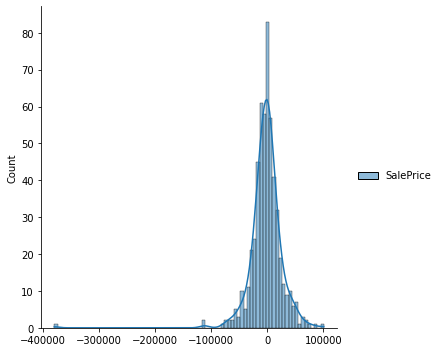

In [ ]:
sns.displot(test_residuals,kde=True)